# Pytorch Training Notebook

## MNIST Example

- Image size 28x28 pixels $\rightarrow$ 784

### Fully Connected MLP Network

Import Torch Libraries

In [14]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Check if CPU | GPU will be used

In [20]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device == "cuda":
    device_name = "CUDA"
else:
    device_name = "CPU"

print("% s will be used for training/testing" % device_name)

CPU will be used for training/testing


Define network Hyperparameters

In [16]:
# neural net input size
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

Load MNIST Dataset

In [17]:
train_dataset = torchvision.datasets.MNIST(root='../data',
                                           train=True,
                                           transform= transforms.ToTensor(),
                                           download=True)


test_dataset = torchvision.datasets.MNIST(root='../data',
                                          train=False,
                                          transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [01:53, 117600.48it/s]                             

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:00<00:00, 121461.00it/s]
32768it [00:00, 123658.37it/s]                           
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



 85%|████████▌ | 1409024/1648877 [00:15<00:01, 149958.98it/s]
9920512it [02:10, 117600.48it/s] [00:15<00:01, 160050.65it/s]
 99%|█████████▉| 1638400/1648877 [00:17<00:00, 84802.61it/s]
1654784it [00:17, 94928.22it/s]                             

0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 31450.96it/s]            

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


Data Loader

In [26]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Build the nueral network

In [28]:
class FcnNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [29]:
neuralNet_model = FcnNeuralNet(input_size, hidden_size, num_classes).to(device)

Loss Optimizer

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(neuralNet_model.parameters(), lr=learning_rate)

Model Training

In [34]:
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images =  images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = neuralNet_model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step[{}/{}], Loss:{:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        


Epoch [1/10], Step[100/600], Loss:0.0025
Epoch [1/10], Step[200/600], Loss:0.0047
Epoch [1/10], Step[300/600], Loss:0.0019
Epoch [1/10], Step[400/600], Loss:0.0049
Epoch [1/10], Step[500/600], Loss:0.0029
Epoch [1/10], Step[600/600], Loss:0.0027
Epoch [2/10], Step[100/600], Loss:0.0036
Epoch [2/10], Step[200/600], Loss:0.0018
Epoch [2/10], Step[300/600], Loss:0.0018
Epoch [2/10], Step[400/600], Loss:0.0111
Epoch [2/10], Step[500/600], Loss:0.0015
Epoch [2/10], Step[600/600], Loss:0.0111
Epoch [3/10], Step[100/600], Loss:0.0112
Epoch [3/10], Step[200/600], Loss:0.0020
Epoch [3/10], Step[300/600], Loss:0.0044
Epoch [3/10], Step[400/600], Loss:0.0028
Epoch [3/10], Step[500/600], Loss:0.0375
Epoch [3/10], Step[600/600], Loss:0.0010
Epoch [4/10], Step[100/600], Loss:0.0075
Epoch [4/10], Step[200/600], Loss:0.0013
Epoch [4/10], Step[300/600], Loss:0.0019
Epoch [4/10], Step[400/600], Loss:0.0003
Epoch [4/10], Step[500/600], Loss:0.0030
Epoch [4/10], Step[600/600], Loss:0.0036
Epoch [5/10], St

In [36]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = neuralNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 98.17 %


In [38]:
print(FcnNeuralNet)

<class '__main__.FcnNeuralNet'>


### Fully Connected MLP with Dropout

In [88]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

In [89]:
# neural net input size
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2


In [90]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = torchvision.datasets.MNIST(root='../data', train=True,
                                   download=False, transform=transform)
test_data = torchvision.datasets.MNIST(root='../data', train=False,
                                  download=False, transform=transform)

In [91]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

Visualize a batch of Training Data

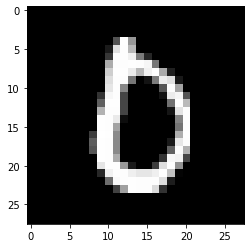

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
# obtain one batch of training images
batch_iter = iter(train_loader)
images_batch, labels_batch = batch_iter.next()

image = images_batch[0]

img = np.array(image, dtype='float')
img = img.reshape((28, 28))

plt.imshow(img, cmap='gray')
plt.show()

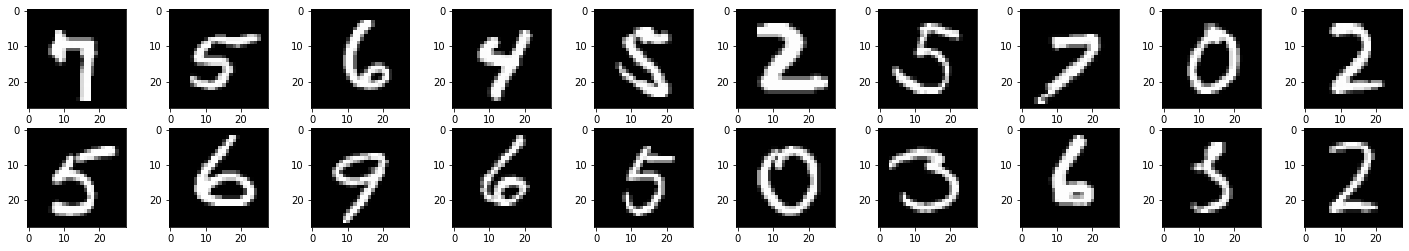

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
batch_iter = iter(train_loader)
images_batch, labels_batch = batch_iter.next()

plt.figure(figsize=(25, 4))
for idx, image in enumerate(images_batch):
    img = np.array(image, dtype='float')
    img = img.reshape((28, 28))
    plt.subplot(2, 10, (idx + 1))
    plt.imshow(img, cmap='gray')

plt.show()

In [94]:
# define the NN architecture
class FcnNeuralNetDropOut(nn.Module):
    def __init__(self):
        super().__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout_02 = nn.Dropout(0.2)
        self.dropout_04 = nn.Dropout(0.4)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout_02(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout_04(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = FcnNeuralNetDropOut()
print(model)

FcnNeuralNetDropOut(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout_02): Dropout(p=0.2, inplace=False)
  (dropout_04): Dropout(p=0.4, inplace=False)
)


__Specify Loss Function and Optimizer__

In [95]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

__Train the Network__

In [96]:
# number of epochs to train the model
n_epochs = 20

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss


Epoch: 1 	Training Loss: 0.254036 	Validation Loss: 0.114646
Validation loss decreased (inf --> 0.114646).  Saving model ...
Epoch: 2 	Training Loss: 0.127312 	Validation Loss: 0.113780
Validation loss decreased (0.114646 --> 0.113780).  Saving model ...
Epoch: 3 	Training Loss: 0.100769 	Validation Loss: 0.089114
Validation loss decreased (0.113780 --> 0.089114).  Saving model ...
Epoch: 4 	Training Loss: 0.086199 	Validation Loss: 0.084997
Validation loss decreased (0.089114 --> 0.084997).  Saving model ...
Epoch: 5 	Training Loss: 0.073027 	Validation Loss: 0.091493
Epoch: 6 	Training Loss: 0.066631 	Validation Loss: 0.087118
Epoch: 7 	Training Loss: 0.062536 	Validation Loss: 0.080425
Validation loss decreased (0.084997 --> 0.080425).  Saving model ...
Epoch: 8 	Training Loss: 0.057281 	Validation Loss: 0.098358
Epoch: 9 	Training Loss: 0.054313 	Validation Loss: 0.093241
Epoch: 10 	Training Loss: 0.050227 	Validation Loss: 0.097559
Epoch: 11 	Training Loss: 0.045620 	Validation Lo